<a href="https://colab.research.google.com/github/maslovalyudmila/ds_school_2020/blob/master/Maslova_4th_3d_Tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import libraries

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

**Preprocessing the data**

In [0]:
# import our data

df = pd.read_csv('/content/houses_to_rent_v2.csv')

In [0]:
# create a binary column with target variable 'best demand'

df['best demand'] = df['total (R$)']
df_1 = df['best demand']
df_1.loc[df_1 <= 3580] = 1
df_1.loc[df_1 > 3580] = 0

In [0]:
# make categorical features as quantitive

from sklearn.preprocessing import LabelEncoder

df['animal'] = df['animal'].factorize()[0]
df['furniture'] = df['furniture'].factorize()[0]

labelencoder = LabelEncoder()
df.city = labelencoder.fit_transform(df.city)
df.floor = labelencoder.fit_transform(df.floor)

In [0]:
# delete hierarchy

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(transformers=[('city', OneHotEncoder(), [0,4])])
transformer = ColumnTransformer(transformers=[('floor', OneHotEncoder(), [0,34])])

In [8]:
# read first 5 rows of data

df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),best demand
0,4,70,2,1,1,32,0,0,2065,3300,211,42,5618,0
1,4,320,4,4,0,13,0,1,1200,4960,1750,63,7973,0
2,2,80,1,1,1,31,0,1,1000,2800,0,41,3841,0
3,2,51,2,1,0,12,0,1,270,1112,22,17,1421,1
4,4,25,1,1,0,1,1,1,0,800,25,11,836,1


In [0]:
dataset = df.drop(['total (R$)'], axis=1).values

In [10]:
dataset

array([[   4,   70,    2, ...,  211,   42,    0],
       [   4,  320,    4, ..., 1750,   63,    0],
       [   2,   80,    1, ...,    0,   41,    0],
       ...,
       [   3,   70,    3, ...,  332,   78,    0],
       [   3,  120,    2, ...,  279,  155,    0],
       [   4,   80,    2, ...,  165,   22,    1]])

In [0]:
X = dataset[:, 0:12]
Y = dataset[:, 12]

In [0]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_scale = standard_scaler.fit_transform(X)

In [27]:
X_scale

array([[ 0.75256677, -0.14752165, -0.432099  , ..., -0.17493534,
        -0.05010297, -0.23658936],
       [ 0.75256677,  0.31803478,  1.27553453, ...,  0.31209868,
         0.44512065,  0.20305577],
       [-0.64949698, -0.12889939, -1.28591577, ..., -0.32163234,
        -0.11799913, -0.25752484],
       ...,
       [ 0.05153489, -0.14752165,  0.42171777, ...,  0.61722843,
        -0.01116726,  0.51708801],
       [ 0.05153489, -0.05441036, -0.432099  , ...,  2.37759236,
        -0.02822175,  2.12912015],
       [ 0.75256677, -0.12889939, -0.432099  , ..., -0.73238392,
        -0.06490498, -0.655299  ]])

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [0]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

**Building and training Neutral Network**

Set up the architecture:
- input layer: 12 neurons
- hidden layer 1: 32 neurons, relu activation
- hidden layer 2: 32 neurons, relu activation
- output layer: 1 neuron, sigmoid activation

In [0]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([ Dense(32, activation='relu', input_shape=(12,)), Dense(32, activation='relu'), Dense(1, activation='sigmoid'),])

In [0]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
hist = model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_val, Y_val))

Train on 7484 samples, validate on 1604 samples
Epoch 1/100
7484/7484 [==============================] - 0s 39us/step - loss: 0.0316 - accuracy: 0.9897 - val_loss: 0.0403 - val_accuracy: 0.9838
Epoch 2/100
7484/7484 [==============================] - 0s 40us/step - loss: 0.0310 - accuracy: 0.9885 - val_loss: 0.0432 - val_accuracy: 0.9794
Epoch 3/100
7484/7484 [==============================] - 0s 44us/step - loss: 0.0310 - accuracy: 0.9889 - val_loss: 0.0383 - val_accuracy: 0.9850
Epoch 4/100
7484/7484 [==============================] - 0s 39us/step - loss: 0.0308 - accuracy: 0.9901 - val_loss: 0.0380 - val_accuracy: 0.9850
Epoch 5/100
7484/7484 [==============================] - 0s 37us/step - loss: 0.0308 - accuracy: 0.9888 - val_loss: 0.0420 - val_accuracy: 0.9844
Epoch 6/100
7484/7484 [==============================] - 0s 39us/step - loss: 0.0310 - accuracy: 0.9874 - val_loss: 0.0376 - val_accuracy: 0.9838
Epoch 7/100
7484/7484 [==============================] - 0s 40us/step - loss

In [0]:
model.evaluate(X_test, Y_test)[1]

1604/1604 [==============================] - 0s 25us/step


0.9831671118736267

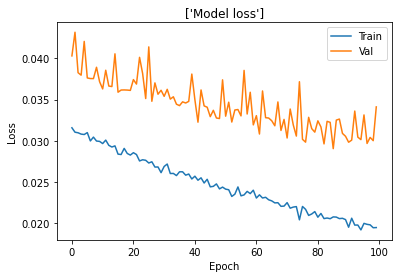

In [0]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title(['Model loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

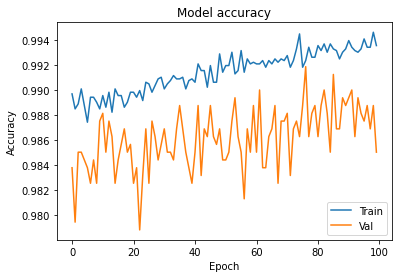

In [0]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [0]:
# adding regularization

model_2 = Sequential([ Dense(1000, activation='relu', input_shape=(12,)), 
                      Dense(1000, activation='relu'), 
                      Dense(1000, activation='relu'), 
                      Dense(1000, activation='relu'), 
                      Dense(1, activation='sigmoid'),])

In [0]:
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
hist_2 = model_2.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_val, Y_val))

Train on 7484 samples, validate on 1604 samples
Epoch 1/100
7484/7484 [==============================] - 11s 1ms/step - loss: 0.1578 - accuracy: 0.9332 - val_loss: 0.1226 - val_accuracy: 0.9507
Epoch 2/100
7484/7484 [==============================] - 11s 1ms/step - loss: 0.0902 - accuracy: 0.9611 - val_loss: 0.0583 - val_accuracy: 0.9751
Epoch 3/100
7484/7484 [==============================] - 11s 1ms/step - loss: 0.0674 - accuracy: 0.9718 - val_loss: 0.0602 - val_accuracy: 0.9713
Epoch 4/100
7484/7484 [==============================] - 11s 1ms/step - loss: 0.0520 - accuracy: 0.9770 - val_loss: 0.0474 - val_accuracy: 0.9794
Epoch 5/100
7484/7484 [==============================] - 11s 1ms/step - loss: 0.0500 - accuracy: 0.9800 - val_loss: 0.0412 - val_accuracy: 0.9813
Epoch 6/100
7484/7484 [==============================] - 11s 1ms/step - loss: 0.0412 - accuracy: 0.9845 - val_loss: 0.0464 - val_accuracy: 0.9844
Epoch 7/100
7484/7484 [==============================] - 11s 1ms/step - loss

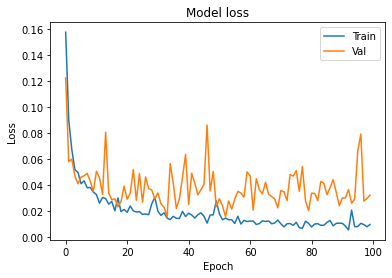

In [0]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [0]:
from keras.layers import Dropout
from keras import regularizers

model_3 = Sequential([ Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(12,)), Dropout(0.3),
                      Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)), Dropout(0.3),
                      Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)), Dropout(0.3), 
                      Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)), Dropout(0.3), 
                      Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),])

In [0]:
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
hist_3 = model_3.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_val, Y_val))

Train on 7484 samples, validate on 1604 samples
Epoch 1/100
7484/7484 [==============================] - 13s 2ms/step - loss: 2.5127 - accuracy: 0.9131 - val_loss: 0.3098 - val_accuracy: 0.9483
Epoch 2/100
7484/7484 [==============================] - 13s 2ms/step - loss: 0.3144 - accuracy: 0.9360 - val_loss: 0.2876 - val_accuracy: 0.9464
Epoch 3/100
7484/7484 [==============================] - 13s 2ms/step - loss: 0.3047 - accuracy: 0.9345 - val_loss: 0.2802 - val_accuracy: 0.9526
Epoch 4/100
7484/7484 [==============================] - 13s 2ms/step - loss: 0.2950 - accuracy: 0.9364 - val_loss: 0.2775 - val_accuracy: 0.9476
Epoch 5/100
7484/7484 [==============================] - 13s 2ms/step - loss: 0.2964 - accuracy: 0.9381 - val_loss: 0.2662 - val_accuracy: 0.9495
Epoch 6/100
7484/7484 [==============================] - 13s 2ms/step - loss: 0.2914 - accuracy: 0.9373 - val_loss: 0.2896 - val_accuracy: 0.9370
Epoch 7/100
7484/7484 [==============================] - 13s 2ms/step - loss

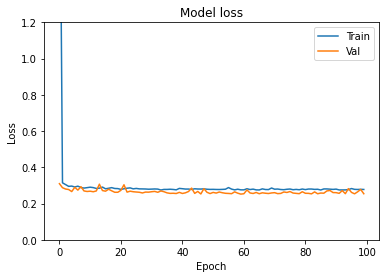

In [0]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

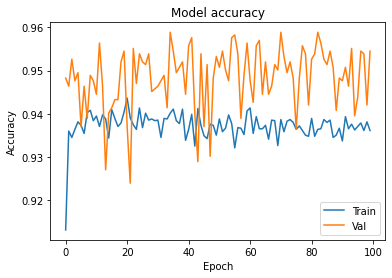

In [0]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

Building and training Neutron Network by Python (without framework)

In [0]:
class Neural_Network(object):
  def __init__(self):
    #parameters
    self.inputSize = 12
    self.outputSize = 1
    self.hiddenSize = 64

    #weights
    self.W1 = np.random.randn(self.inputSize, self.hiddenSize) # weight matrix from input to hidden layer 1
    self.W2 = np.random.randn(self.hiddenSize, self.hiddenSize) # weight matrix from hidden layer 1 to hidden layer 2
    self.W3 = np.random.randn(self.hiddenSize, self.outputSize) # weight matrix from hidden layer 2 to output layer

  def forward(self, X_train): #forward propagation through our network
    self.z = np.dot(X_train, self.W1) # dot product of X (input) and first set of weights
    self.z2 = self.reLU(self.z) # activation function

    self.z3 = np.dot(self.z2, self.W2) # dot product of hidden layer 1 OUTPUT (z2) and second set of weights
    self.z4 = self.reLU(self.z3) # activation function

    self.z5 = np.dot(self.z4, self.W3) # dot product of hidden layer 2 OUTPUT (z4) and thrird set of weights
    o = self.sigmoid(self.z5) # final activation function
    return o

  def reLU(self, s): # reLU activation function
    return np.maximum(s, 0)

  def sigmoid(self, s): # finale sigmoid activation function
    return 1/(1+np.exp(-s))

  def sigmoidPrime(self, s): # derivative (производная) of sigmoid
    return s * (1 - s)

  def reluPrime(self, s): # derivative of relu
    return np.maximum(1, 0)

  def backward(self, X_train, Y_train, o): # backward propgate through the network
    # for outer layer
    self.o_error = Y_train - o # error in output ОШИБКА ВЫЧИСЛЕНИЯ
    self.o_delta = self.o_error*self.sigmoidPrime(o) # applying derivative of sigmoid to error
    
    # for hidden layers
    self.z5_error = self.o_delta.dot(self.W3.T) # z5 error: how much our hidden layer 2 weights contributed to output error
    self.z5_delta = self.z5_error*self.reluPrime(self.z5) # applying derivative of relu to z5 error

    self.z3_error = self.o_delta.dot(self.W2.T) # z3 error: how much our hidden layer 1 weights contributed to output error
    self.z3_delta = self.z3_error*self.reluPrime(self.z3) # applying derivative of relu to z3 error
    
    self.W1 += X_train.T.dot(self.z3_delta) # adjusting first set (input --> hidden) weights
    self.W2 += self.z3.T.dot(self.z5_delta) # adjusting second set (hidden 1 --> hidden 2) weights
    self.W3 += self.z5.T.dot(self.o_delta) # adjusting third set (hidden 2 --> output) weights

  def train(self, X_train, Y_train):
    o = self.forward(X_train)
    self.backward(X_train, Y_train, o)

  def saveWeights(self):
    np.savetxt("w1.txt", self.W1, fmt="%s")
    np.savetxt("w2.txt", self.W2, fmt="%s") 
    np.savetxt("w3.txt", self.W2, fmt="%s")

  def predict(self):
    print('Predicted data based on trained weights: ')
    print('Input (scaled): \n' + str(X_test))
    print('Output: \n' + str(self.forward(Y_test)))


In [44]:
NN = Neural_Network()
for i in range(100):
  print('# ' + str(i) + '\n')
  print('Input (scaled): \n' + str(X_train))
  print('Actual Output: \n' + str(Y_train))
  print('Predicted Output: \n' + str(NN.forward(X_train)))
  print('Loss: \n' + str(np.mean(np.square(Y_train - NN.forward(X_train))))) # mean sum squared loss
  print('\n')
  
NN.train(X_test, Y_test)
NN.saveWeights()
NN.predict()

# 0

Input (scaled): 
[[ 0.75256677 -0.02647698 -0.432099   ... -0.55634753 -0.11639022
  -0.57155707]
 [ 0.75256677 -0.14752165  0.42171777 ... -0.61502633 -0.10448425
  -0.63436352]
 [ 0.75256677 -0.19966397 -1.28591577 ... -0.40965053 -0.05299902
  -0.44594418]
 ...
 [ 0.75256677  0.58247084  3.83698484 ...  1.3800528   0.15036767
   1.60573309]
 [ 0.75256677  0.39252381  2.1293513  ... -0.26295354  0.55259608
  -0.2993958 ]
 [ 0.05153489 -0.19407729 -1.28591577 ... -0.40965053 -0.09096938
  -0.4250087 ]]
Actual Output: 
[1 1 0 ... 0 0 1]
Predicted Output: 
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
Loss: 
0.500187939050345


# 1

Input (scaled): 
[[ 0.75256677 -0.02647698 -0.432099   ... -0.55634753 -0.11639022
  -0.57155707]
 [ 0.75256677 -0.14752165  0.42171777 ... -0.61502633 -0.10448425
  -0.63436352]
 [ 0.75256677 -0.19966397 -1.28591577 ... -0.40965053 -0.05299902
  -0.44594418]
 ...
 [ 0.75256677  0.58247084  3.83698484 ...  1.3800528   0.15036767
   1.60573309]
 [ 0.75256677

ValueError: ignored